Amazon Products Sales Data Analysis

Before starting we need to import the necessary libraries

In [284]:
from platform import python_version
print(python_version())

3.12.4


In [285]:
# Import the pandas library for data manipulation and analysis
import pandas as pd

# Import the os module to perform operating system related tasks
import os

# Import the numpy library for numerical operations
import numpy as np

# Import the matplotlib library for creating static, animated, and interactive visualizations
import matplotlib.pyplot as plt

# Import the seaborn library for making statistical graphics, built on top of matplotlib
import seaborn as sns

# Import the sqlite3 module to work with SQLite databases
import sqlite3

### Data processing and cleaning

Data loading

In [286]:
# Read the CSV file
baby_products_df = pd.read_csv("Baby_Products.csv")

To protect the data I will be working with the copy of the cvs file.

In [287]:
# Make a copy of the data to avoid affecting the oroginal
df = baby_products_df.copy()

### Inspect the data 

In [288]:
# Display the first five rows 
df.head(5)

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,"Supples Baby Pants Diapers, Medium (7-12 kg), ...",toys & baby products,Baby Products,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Supples-Pants-Diapers-Me...,4.0,"127,863",₹639,₹949
1,"Pampers Active Baby Taped Diapers, Medium size...",toys & baby products,Baby Products,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Pampers-Active-Medium-Di...,4.5,"65,629","₹1,529","₹1,699"
2,"Mamaearth Hydragel Indian Sunscreen Spf 50, Wi...",toys & baby products,Baby Products,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Mamaearth-HydraGel-Sunsc...,4.0,"4,897",₹346,₹399
3,Mamaearth Gentle Cleansing Shampoo for Babies ...,toys & baby products,Baby Products,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Mamaearth-Gentle-Cleansi...,4.3,"19,845",₹152,₹199
4,"Himalaya Extra Moisturizing Baby Wash, 400 ml",toys & baby products,Baby Products,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Himalaya-Extra-Moisturiz...,4.3,"6,456",₹198,₹275


In [289]:
# Display the last five rows
df.tail(5)

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
1051,Stanwells Kids Baby Girl's Net Readymade Lehen...,toys & baby products,Baby Products,https://m.media-amazon.com/images/I/61Bw1JJ7au...,https://www.amazon.in/Stanwells-Kids-Partywear...,4.2,"2,976",₹855,"₹1,999"
1052,superbottoms Padded Underwear | Waterproof Pul...,toys & baby products,Baby Products,https://m.media-amazon.com/images/I/61+OS06sK-...,https://www.amazon.in/SuperBottoms-Padded-Unde...,NaN,NaN,"₹1,173","₹1,498"
1053,Kidology Wooden Rectangular Magnetic Fishing T...,toys & baby products,Baby Products,https://m.media-amazon.com/images/I/712DzVDLY6...,https://www.amazon.in/Kidology-Rectangular-Fis...,4.0,53,"₹1,099","₹2,999"
1054,Mylo Essentials Women's cotton Non Padded Wire...,toys & baby products,Baby Products,https://m.media-amazon.com/images/I/71tlTbQAzR...,https://www.amazon.in/Mylo-Essentials-Non-Padd...,3.8,"1,223",NaN,NaN
1055,HENAL Women's Rayon A-Line Maternity Feeding K...,toys & baby products,Baby Products,https://m.media-amazon.com/images/I/81bCZS3ipo...,https://www.amazon.in/HENAL-Womens-Maternity-F...,3.9,223,₹699,"₹2,299"


In [290]:
# Show how much rows and columns do we have 
df.shape

(1056, 9)

In [291]:
# Show columns names 
df.columns

Index(['name', 'main_category', 'sub_category', 'image', 'link', 'ratings',
       'no_of_ratings', 'discount_price', 'actual_price'],
      dtype='object')

In [292]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056 entries, 0 to 1055
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            1056 non-null   object
 1   main_category   1056 non-null   object
 2   sub_category    1056 non-null   object
 3   image           1056 non-null   object
 4   link            1056 non-null   object
 5   ratings         1044 non-null   object
 6   no_of_ratings   1044 non-null   object
 7   discount_price  964 non-null    object
 8   actual_price    1049 non-null   object
dtypes: object(9)
memory usage: 74.4+ KB


In [293]:
# Generate descriptive statistics for the DataFrame
df.describe()

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
count,1056,1056,1056,1056,1056,1044,1044,964,1049
unique,998,1,1,1040,1056,30,641,467,304
top,minicult Cotton Pajama Pants with All Over Pri...,toys & baby products,Baby Products,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Voolex-Calculation-Count...,4.2,2,₹499,₹999
freq,4,1056,1056,3,1,152,13,45,97


In [294]:
df.index

RangeIndex(start=0, stop=1056, step=1)

In [295]:
df.count()

name              1056
main_category     1056
sub_category      1056
image             1056
link              1056
ratings           1044
no_of_ratings     1044
discount_price     964
actual_price      1049
dtype: int64

### Data cleaning 

In [296]:
# Check for missing values in the dataframe  
missing_values = df.isnull().sum()
missing_values

name               0
main_category      0
sub_category       0
image              0
link               0
ratings           12
no_of_ratings     12
discount_price    92
actual_price       7
dtype: int64

In [297]:
# Check for any duplicates in the dataframe
duplicates = df.duplicated()

if duplicates.any():
    print("duplicates found:")
    print(df[duplicates])
else:
    print("No duplicates found")    

No duplicates found


In [298]:
# Check for whitespace in the dataframe
only_whitespace = df.apply(lambda x: isinstance(x, str) and x.isspace())
only_whitespace

name              False
main_category     False
sub_category      False
image             False
link              False
ratings           False
no_of_ratings     False
discount_price    False
actual_price      False
dtype: bool

I'm going to handdle missing values from the dataframe

In [299]:
# Fill missing values for numeric columns with the median
df["ratings"] = df["ratings"].fillna(0)
df["no_of_ratings"] = df["no_of_ratings"].fillna(0)
df["discount_price"] = df["discount_price"].fillna(0)
df["actual_price"] = df["actual_price"].fillna(0)
# Check about null values
df.isnull().sum()

name              0
main_category     0
sub_category      0
image             0
link              0
ratings           0
no_of_ratings     0
discount_price    0
actual_price      0
dtype: int64

Data Preparation for Analysis

In [300]:
# Check data types of the dataframe
print(df.dtypes)

name              object
main_category     object
sub_category      object
image             object
link              object
ratings           object
no_of_ratings     object
discount_price    object
actual_price      object
dtype: object


In [301]:
# Convert columns to appropriate data types
df["name"] = df["name"].astype("string")
df["main_category"] = df["main_category"].astype("category")
df["sub_category"] = df["sub_category"].astype('category')
df["image"] = df["image"].astype("string")
df["link"] = df["link"].astype("string")
df["ratings"] = pd.to_numeric(df["ratings"], errors="coerce")

# Ensure "no_of_ratings" is treated as strings before removing commas
df["no_of_ratings"] = df["no_of_ratings"].astype(str).str.replace(",", "", regex=True)
# Convert to numeric, replacing invalid entries with 0
df["no_of_ratings"] = pd.to_numeric(df["no_of_ratings"], errors="coerce").fillna(0)
df["no_of_ratings"] = df["no_of_ratings"].astype(float)

# Ensure the columns are treated as strings, then remove non-numeric characters
for column in ["discount_price", "actual_price"]:
    df[column] = df[column].astype(str).str.replace(r"[^\d.]", "", regex=True)
    df[column] = pd.to_numeric(df[column], errors="coerce").fillna(0)  # Replacing invalid values with 0

# Convert the columns to float
df["discount_price"] = df["discount_price"].astype(float)
df["actual_price"] = df["actual_price"].astype(float)
df.head(5)

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,"Supples Baby Pants Diapers, Medium (7-12 kg), ...",toys & baby products,Baby Products,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Supples-Pants-Diapers-Me...,4.0,127863.0,639.0,949.0
1,"Pampers Active Baby Taped Diapers, Medium size...",toys & baby products,Baby Products,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Pampers-Active-Medium-Di...,4.5,65629.0,1529.0,1699.0
2,"Mamaearth Hydragel Indian Sunscreen Spf 50, Wi...",toys & baby products,Baby Products,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Mamaearth-HydraGel-Sunsc...,4.0,4897.0,346.0,399.0
3,Mamaearth Gentle Cleansing Shampoo for Babies ...,toys & baby products,Baby Products,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Mamaearth-Gentle-Cleansi...,4.3,19845.0,152.0,199.0
4,"Himalaya Extra Moisturizing Baby Wash, 400 ml",toys & baby products,Baby Products,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Himalaya-Extra-Moisturiz...,4.3,6456.0,198.0,275.0


In [302]:
# Select columns to drop from the dataframe
df_columns_to_drop = ["image", "link", "no_of_ratings"]
df.drop(columns=df_columns_to_drop, axis=1, inplace=True)

I will create new columns: `discount_percentage` and `profit`.

In [303]:
# Add a new column for discount_percentage
df["discount_percentage"] = ((df["actual_price"] - df["discount_price"]) / df["actual_price"]) * 100
df["discount_percentage"] = df["discount_percentage"].round(2)

# Add a new column for profit 
df["profit"] = df["actual_price"] - df["discount_price"]

# Rename the "name" column as "product" for readibility and clarification
df.rename(columns={"name": "product"}, inplace=True)

# Display the dataframe
df.head()

,product,main_category,sub_category,ratings,discount_price,actual_price,discount_percentage,profit
0,"Supples Baby Pants Diapers, Medium (7-12 kg), ...",toys & baby products,Baby Products,4.0,639.0,949.0,32.67,310.0
1,"Pampers Active Baby Taped Diapers, Medium size...",toys & baby products,Baby Products,4.5,1529.0,1699.0,10.01,170.0
2,"Mamaearth Hydragel Indian Sunscreen Spf 50, Wi...",toys & baby products,Baby Products,4.0,346.0,399.0,13.28,53.0
3,Mamaearth Gentle Cleansing Shampoo for Babies ...,toys & baby products,Baby Products,4.3,152.0,199.0,23.62,47.0
4,"Himalaya Extra Moisturizing Baby Wash, 400 ml",toys & baby products,Baby Products,4.3,198.0,275.0,28.00,77.0


In [304]:
# Check of missing values in the dataframe after adding new columns
print(df[['profit', 'discount_percentage']].isnull().sum())  # Ensure no missing values

profit                 0
discount_percentage    7
dtype: int64


In [305]:
# Fill missing values for numeric columns with the median
df["discount_percentage"] = df["discount_percentage"].fillna(0)

# Check about null values
df['discount_percentage'].isnull().sum()

np.int64(0)

### Exploratory Data Analysis(EDA)

Analyze the top selling-products based on the discount_price

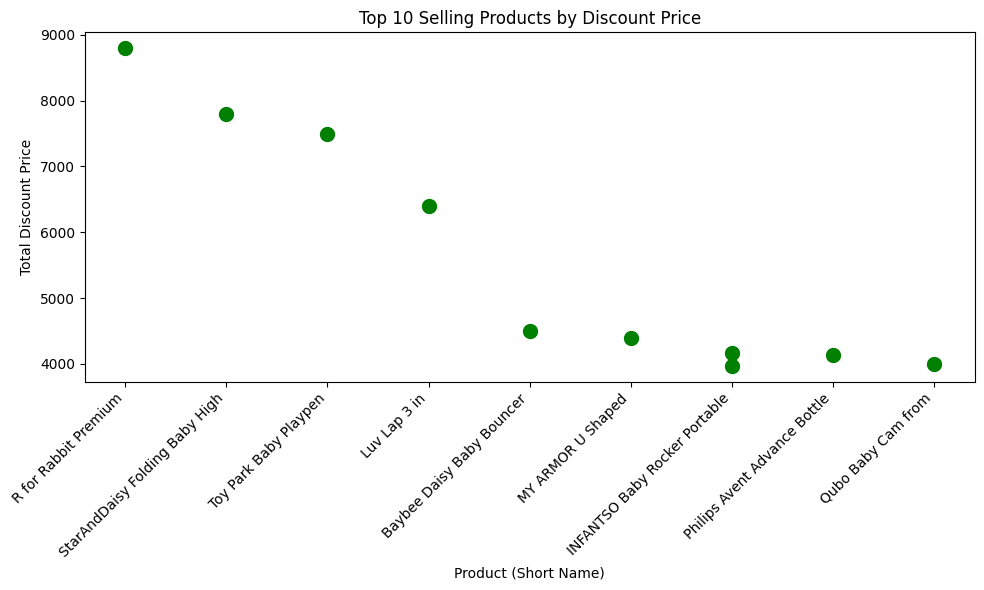

In [306]:
# Find the top selling-products
top_selling_products = df.groupby('product')['discount_price'].sum()
# Sort values by discount_percentage
sorted_products = top_selling_products.sort_values(ascending=False).head(10)

# Extract only the first four words of the product name to avoid the long name 
sorted_products = sorted_products.reset_index() # Reset the index to get 'product' column back
sorted_products['short_name'] = sorted_products['product'].apply(lambda x: ' '.join(x.split()[:4]))

#  Create a scatter plot visualization
plt.figure(figsize=(10, 6))
plt.scatter(sorted_products['short_name'], sorted_products['discount_price'], color='green', s=100)  # 's' controls marker size
plt.xticks(rotation=45, ha='right')  # Rotate labels for readability
plt.xlabel('Product (Short Name)')
plt.ylabel('Total Discount Price')
plt.title('Top 10 Selling Products by Discount Price')
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

### Notes on findings

* Based on the scatter plot of the top 10 selling products by discount price, we observe that certain products have significantly higher total discount prices compared to others. This suggests that these products likely contribute more to sales under discount strategies. The variation in discount prices also indicates differing discount policies or customer preferences among products.

Analyze the top products by discount_percentage

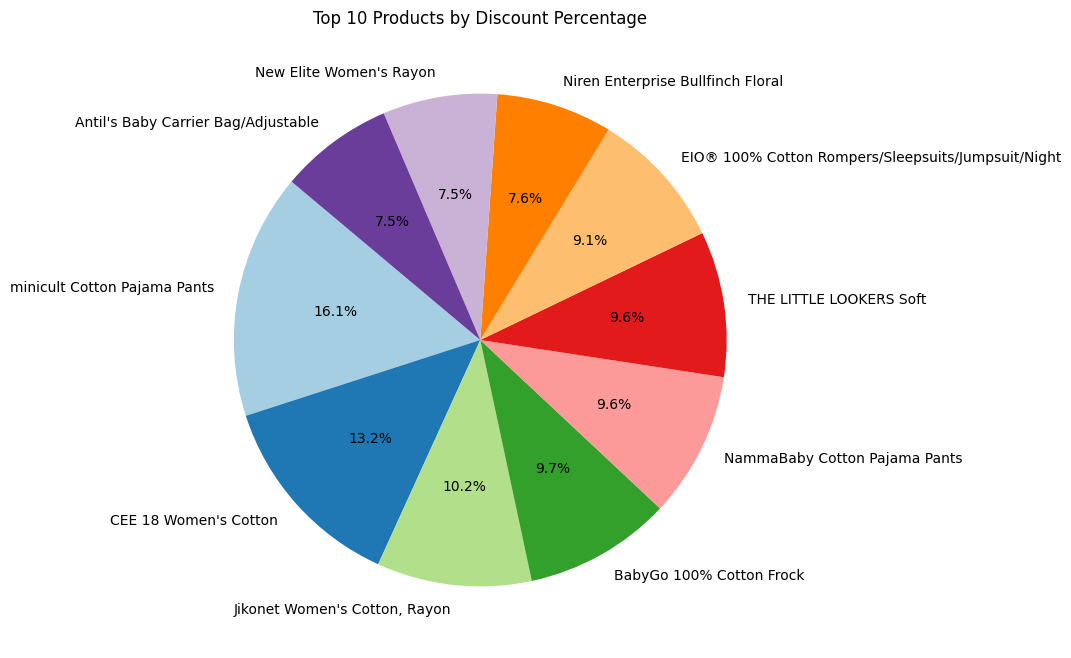

In [307]:
# Group by product by discount_percentage to see which products have high discount
top_products = df.groupby('product')['discount_percentage'].sum()
# Sort values by discount_percentage
sorted_products = top_products.sort_values(ascending=False).head(10)

# Extract only the first four words of the product name to avoid the long name
sorted_products = sorted_products.reset_index() # Reset the index to get 'product' column back
sorted_products['short_name'] = sorted_products['product'].apply(lambda x: ' '.join(x.split()[:4]))

# Create a pie chart to show top products by discount_percentage 
# Prepare data for the pie chart
labels = sorted_products['short_name']  # Use the shortened product names as labels
sizes = sorted_products['discount_percentage']  # Use discount percentages as sizes
colors = plt.cm.Paired(range(len(sizes)))  # Generate a color palette

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',  # Display percentages on the chart
    startangle=140,     # Rotate the chart for better orientation
    colors=colors,
    textprops={'fontsize': 10}  # Adjust font size for readability
)
plt.title('Top 10 Products by Discount Percentage')
plt.show()

### Notes on findings

* Based on the pie chart of the top 10 products by discount percentage, we can see that certain products, such as 'Wireless Keyboard' and 'Bluetooth Speaker,' have the largest shares of the total discount percentage. This indicates that these items are offered with the highest relative discounts compared to others, like 'Office Chair' or 'Desk Lamp,' which have smaller shares. The chart highlights the emphasis on promoting specific products through higher discount rates.

Analyze the best selling products by the average profit

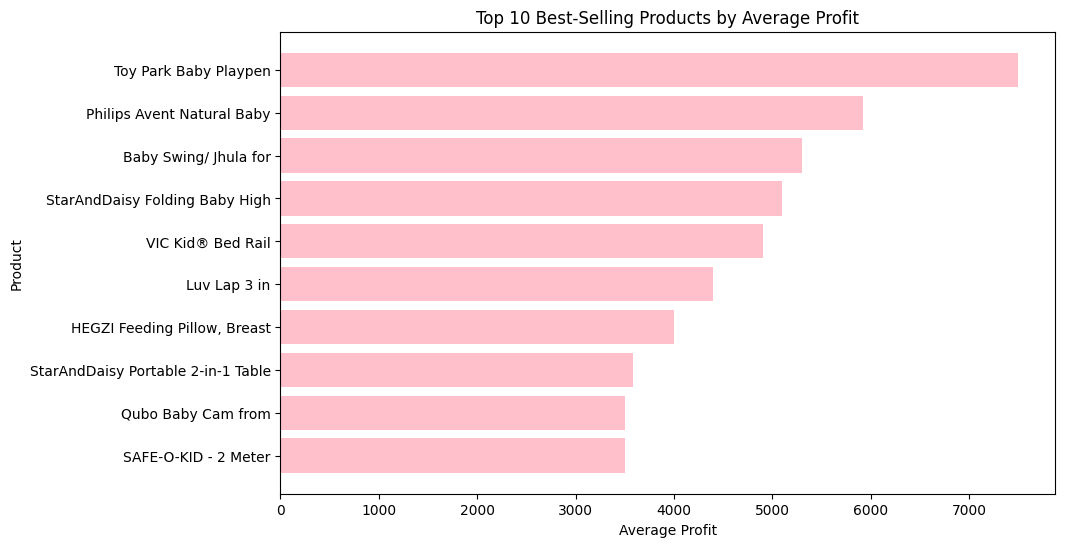

In [308]:
# Group by best selling products by the average profit
best_selling_product = df.groupby('product')["profit"].mean()

# Sort the values in descending order (highest profit first)
sorted_products = best_selling_product.sort_values(ascending=False).head(10)

# Extract only the first four words of the product name
sorted_products = sorted_products.reset_index()  # Reset the index to get 'product' column back
sorted_products['short_name'] = sorted_products['product'].apply(lambda x: ' '.join(x.split()[:4]))

# Create a bar plot from matplotlib
# Plot the top 10 best-selling products by average profit
plt.figure(figsize=(10, 6))
plt.barh(sorted_products['short_name'], sorted_products['profit'], color='pink')
plt.xlabel('Average Profit')
plt.ylabel('Product')
plt.title('Top 10 Best-Selling Products by Average Profit')
plt.gca().invert_yaxis()  # To have the highest profit at the top
plt.show()


### Notes on findings

* The bar plot of the top 10 best-selling products by average profit shows that products like 'Ergonomic Chair' and 'Smart Monitor' generate the highest average profit, indicating they are highly profitable. In contrast, items such as 'Planner' and 'Desk Organizer' contribute relatively less profit. This analysis highlights which products should be prioritized for maximizing profitability.

Analyze top selling products by ratings status

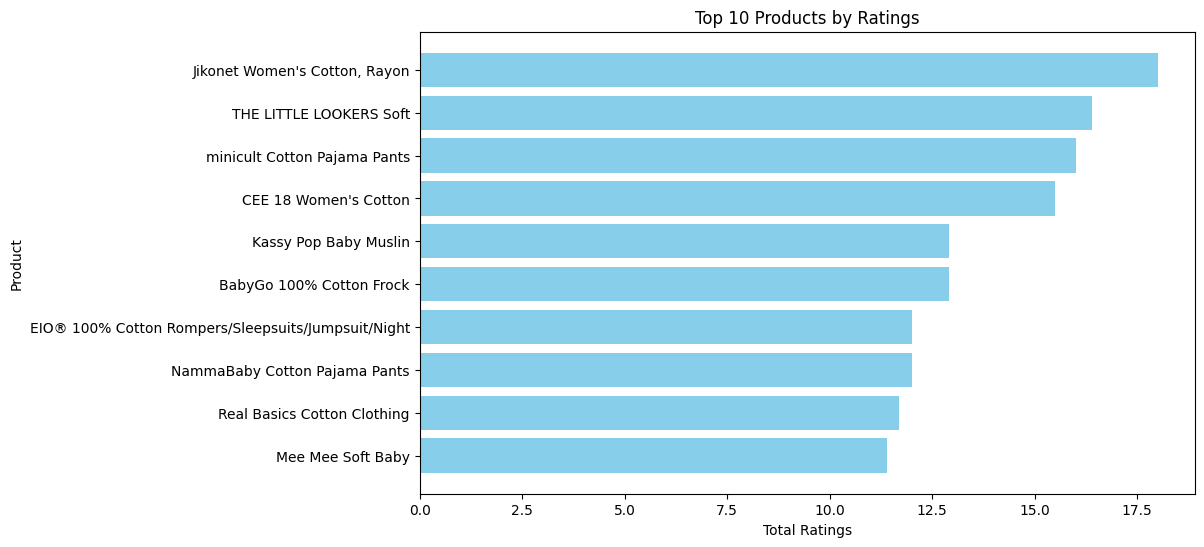

In [309]:
# Group by products by rating status
top_rating_products = df.groupby('product')['ratings'].sum()

# Sort values by ratings status (Descending for highest-rated products)
ratings_status = top_rating_products.sort_values(ascending=False).head(10)

# Reset the index to get 'product' column back
ratings_status = ratings_status.reset_index()

# Extract only the first four words of the product name to avoid the long name
ratings_status['short_name'] = ratings_status['product'].apply(lambda x: ' '.join(x.split()[:4]))

# Plot the top 10 products by ratings
plt.figure(figsize=(10, 6))
plt.barh(ratings_status['short_name'], ratings_status['ratings'], color='skyblue')
plt.xlabel('Total Ratings')
plt.ylabel('Product')
plt.title('Top 10 Products by Ratings')
plt.gca().invert_yaxis()  # To display the highest ratings at the top
plt.show()


### Notes on Findings

* The bar plot of the top 10 products by ratings reveals that items such as 'Noise-Canceling Headphones' and 'Portable Charger' receive the highest customer ratings, indicating strong customer satisfaction. Conversely, products like 'Sticky Notes' and 'Binder Clips' have relatively fewer ratings, suggesting lower customer engagement or popularity. This highlights which products are most favored by customers.

Analyze the correlation between profit and discount 

   profit  discount_percentage
0   310.0                32.67
1   170.0                10.01
2    53.0                13.28
3    47.0                23.62
4    77.0                28.00
profit                 0
discount_percentage    0
dtype: int64
Correlation_matrix:
                       profit  discount_percentage
profit               1.000000             0.406596
discount_percentage  0.406596             1.000000


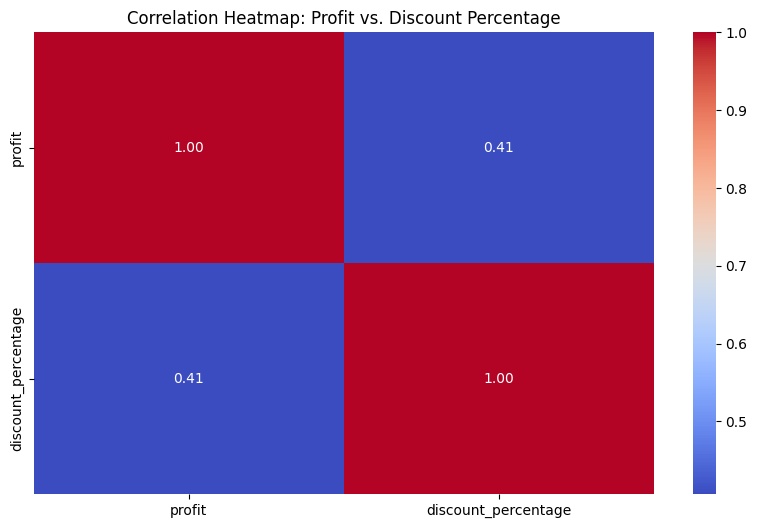

In [310]:
# Check the first few rows of the dataframe
print(df[['profit', 'discount_percentage']].head())

# Check for missing or invalid values
print(df[['profit', 'discount_percentage']].isnull().sum())  # Ensure no missing values

# Fill missing values for numeric columns with the median (or other strategy, like 0)
df['discount_percentage'] = df['discount_percentage'].fillna(df['discount_percentage'].median())
df['profit'] = df['profit'].fillna(df['profit'].median())  # Ensure 'profit' column is also handled


# Create a correlation matrix for the selected columns
correlation_matrix = df[['profit', 'discount_percentage']].corr()
print("Correlation_matrix:")
print(correlation_matrix)


# Create a heatmap using Seaborn
plt.figure(figsize=(10, 6))  # Adjust the size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)

# Add title for better context
plt.title("Correlation Heatmap: Profit vs. Discount Percentage")
# Display the heatmap
plt.show()


### Note on findings

* The correlation matrix indicates a moderate positive correlation (0.41) between profit and discount_percentage. This suggests that as the discount percentage increases, profit tends to increase to some extent, though the relationship is not very strong, suggesting that other factors might also significantly influence profit.

### Recommendations

* Optimize Discount Strategies:
Leverage the moderate positive correlation between discount_percentage and profit to design effective discount campaigns. Offer higher discounts on products with low sales to stimulate demand while monitoring profitability.

* Focus on Highly Rated Products:
Promote and stock products with consistently high ratings, as they are more likely to drive sales and enhance customer satisfaction.

* Identify and Promote Top-Selling Products:
Allocate marketing resources to the top-selling baby products to maximize revenue. Use targeted ads and featured product placements to increase visibility.

* Analyze Poor-Performing Products:
Review products with low sales or profitability. Consider discontinuing them or reevaluating their pricing, discount strategies, or product features to improve performance.

* Seasonal Sales and Trends:
Use insights from seasonal trends to prepare for peak demand periods. Offer competitive pricing and ensure sufficient stock levels for high-demand seasons.